SIR

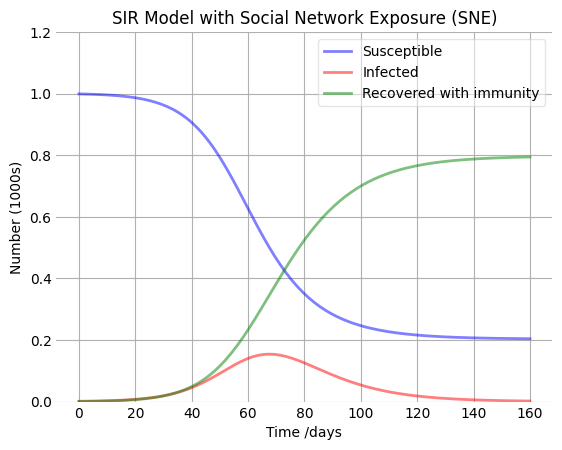

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, mean recovery rate, gamma, and SNE factor.
beta, gamma = 0.2, 1. / 10
SNE = 1

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations with SNE
def deriv(y, t, N, beta, gamma, SNE):
    S, I, R = y
    dSdt = -beta * S * I / N * SNE  # Incorporating SNE
    dIdt = beta * S * I / N * SNE - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, SNE))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t), and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(True)  # Simplified grid setup
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SIR Model with Social Network Exposure (SNE)')
plt.show()


Effect of changing SNE

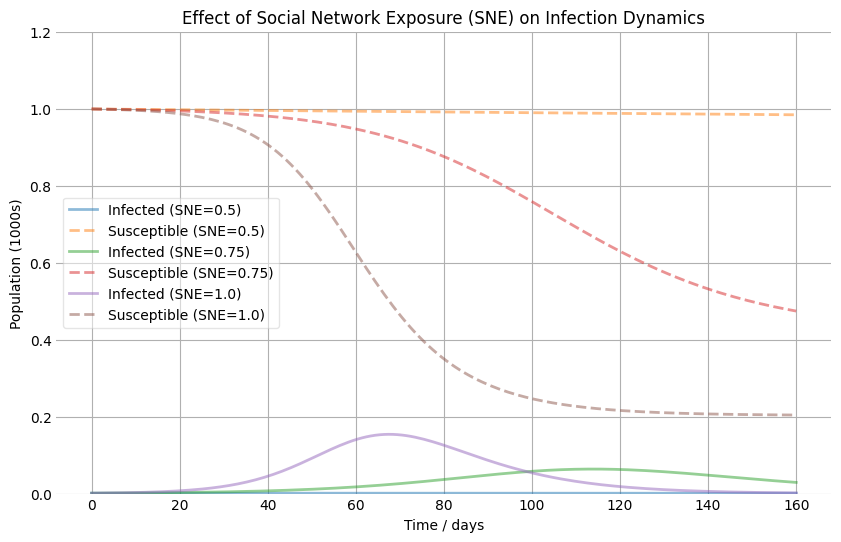

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, mean recovery rate, gamma.
beta, gamma = 0.2, 1. / 10

# List of SNE values to test
SNE_values = [0.5, 0.75, 1.0]  # Different levels of Social Network Exposure

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations with SNE
def deriv(y, t, N, beta, gamma, SNE):
    S, I, R = y
    dSdt = -beta * S * I / N * SNE  # Incorporating SNE
    dIdt = beta * S * I / N * SNE - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='w', dpi=100)

# Loop through each SNE value and run the simulation
for SNE in SNE_values:
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, SNE))
    S, I, R = ret.T

    # Plot the results for each SNE value
    ax.plot(t, I/1000, alpha=0.5, lw=2, label=f'Infected (SNE={SNE})')  # Infected curve
    ax.plot(t, S/1000, alpha=0.5, lw=2, linestyle='--', label=f'Susceptible (SNE={SNE})')  # Susceptible curve

# Plot settings
ax.set_xlabel('Time / days')
ax.set_ylabel('Population (1000s)')
ax.set_ylim(0, 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(True)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('Effect of Social Network Exposure (SNE) on Infection Dynamics')
plt.show()
